# Mathematical Model for Malaria

### Roshan Kern

We are recreating and extending the paper: A Mathematical Model for the Dynamics and Control of Malaria in Nigeria by O.C. Collins and K.J. Duffy, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9661649/.

## Figure 1

Figure 1 is an illustration of the malaria model (shown below). 

![image.png](images/figure1.jpeg)

Fig 1. Schematic illustration of the malaria model (Collins & Duffy, 2022).

## Figure 2 Replication

Labeled[-Graphics-, {Time(years), Incidence of malaria in Nigeria}, {Bottom, Left}, 
 
>   RotateLabel -> True]
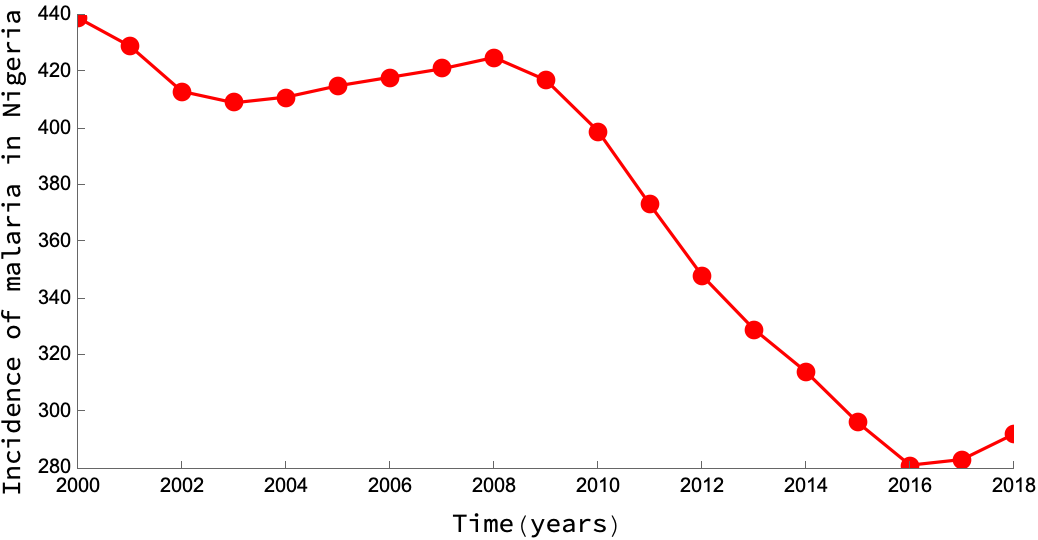

In [3]:
(*The authors shared the original malaria data used in the paper via \
email. This data is replicated in the variable malariaData below*)
malariaData = {{2000, 439}, {2001, 429}, {2002, 413}, {2003, 
    409}, {2004, 411}, {2005, 415}, {2006, 418}, {2007, 421}, {2008, 
    425}, {2009, 417}, {2010, 399}, {2011, 373}, {2012, 348}, {2013, 
    329}, {2014, 314}, {2015, 296}, {2016, 281}, {2017, 283}, {2018, 
    292}};

figure2 = Labeled[
  ListLinePlot[
   malariaData, 
   Mesh -> All, 
   ImageSize -> {500, 250},
   AspectRatio -> Full,
   PlotStyle -> {PointSize[0.02], Red}, 
   PlotRange -> {{2000, 2018}, {280, 440}},
   Ticks -> {Range[2000, 2018, 2], Range[280, 440, 20]}
   ],
  {"Time(years)", "Incidence of malaria in Nigeria"},
  {Bottom, Left},
  RotateLabel -> True
  ]

## Figure 3 Replication

### Replication Logic

In order to replicate figure 3, we need to solve the system of differential equations given in the paper. We use Model 2 (nondimensionalized) because this model has no units and is significantly easier to analyze.

We have the 8 state variable equations and have all 8 state variable initial values except x0 and y0. Thus, it is necessary to use a Manipulate function in Mathematica to find the values of x0 and y0 that will recreate Figure 3. Given that x(t) and y(t) should sum to 1 (they comprise the normalized mosquito population), we only need to manipulate one slider and should be able to quickly find x0 and y0.

A screenshot of the nondimensionalized model equations is below:

![image.png](images/model-2-equations.png)

### Define Model (state vars, parameters, etc)

In [4]:
(*Define state variables*)
stateVariablesND = 
  {
   s[t],
   Subscript[i, r][t],
   Subscript[i, s][t],
   Subscript[T, r][t],
   Subscript[T, s][t],
   r[t],
   x[t],
   y[t]
   };
(*Define parameters*)
scalingFactor = 
  365; (*A scaling factor of 365 converts parameters in per day to \
per year*)
parametersND = 
  {
   \[Beta] -> 
    0.0044*(1 + Cos[Pi*t/15])*
     scalingFactor, (*The paper states "The transmission rate \[Beta] \
is multiplied by a seasonality factor (1+cos(𝜋𝑡/15)) to account for \
irregular seasonal pattern in the data"*)
   Subscript[\[Alpha], r] -> 0.0044*scalingFactor,
   Subscript[\[Alpha], s] -> 0.0044*scalingFactor,
   \[Mu] -> 1/(70*365)*scalingFactor,
   p -> 0.3, (*Dimensionless*)
   c -> 0.1742, (*Dimensionless*)
   Subscript[\[Sigma], r] -> 0.0024*scalingFactor,
   Subscript[\[Sigma], s] -> 0.0027*scalingFactor,
   Subscript[\[Gamma], r] -> 0.00019*scalingFactor,
   Subscript[\[Gamma], s] -> 0.0022*scalingFactor,
   Subscript[\[Epsilon], r] -> 0.0055*scalingFactor,
   Subscript[\[Epsilon], s] -> 0.0006*scalingFactor,
   \[Omega] -> 0.005*scalingFactor,
   \[Xi] -> 1/15*scalingFactor,
   m -> 10 (*Dimensionless*)
   };
(*Define system of differential equations*)
equationsND = {
   s'[t] == \[Mu] - (1 - c)*m*\[Beta]*s[t]*y[t] - \[Mu]*
      s[t] + \[Omega]*r[t],
   Derivative[1][Subscript[i, r]][t] == 
    p*(1 - c)*m*\[Beta]*s[t]*y[t] - (Subscript[\[Sigma], r] + \[Mu])*
      Subscript[i, r][t] + Subscript[\[Epsilon], r]*Subscript[T, r][t],
   Derivative[1][Subscript[i, s]][
     t] == (1 - p)*(1 - c)*m*\[Beta]*s[t]*
      y[t] - (Subscript[\[Sigma], s] + \[Mu])*Subscript[i, s][t] + 
     Subscript[\[Epsilon], s]*Subscript[T, s][t],
   Derivative[1][Subscript[T, r]][t] == 
    Subscript[\[Sigma], r]*
      Subscript[i, r][
       t] - (Subscript[\[Gamma], r] + Subscript[\[Epsilon], 
        r] + \[Mu])*Subscript[T, r][t],
   Derivative[1][Subscript[T, s]][t] == 
    Subscript[\[Sigma], s]*
      Subscript[i, s][
       t] - (Subscript[\[Gamma], s] + Subscript[\[Epsilon], 
        s] + \[Mu])*Subscript[T, s][t],
   r'[t] == 
    Subscript[\[Gamma], r]*Subscript[T, r][t] + 
     Subscript[\[Gamma], s]*Subscript[T, s][t] - (\[Omega] + \[Mu])*
      r[t],
   x'[t] == \[Xi] - (1 - c)*Subscript[\[Alpha], r]*x[t]*
      Subscript[i, r][t] - (1 - c)*Subscript[\[Alpha], s]*x[t]*
      Subscript[i, s][t] - \[Xi]*x[t],
   y'[t] == (1 - c)*Subscript[\[Alpha], r]*x[t]*
      Subscript[i, r][t] + (1 - c)*Subscript[\[Alpha], s]*x[t]*
      Subscript[i, s][t] - \[Xi]*y[t]
   };
(*Define initial conditions*)
initialConditionsND = 
  {
   s[0] == s0,
   Subscript[i, r][0] == Subscript[i0, r],
   Subscript[i, s][0] == Subscript[i0, s],
   Subscript[T, r][0] == Subscript[T0, r],
   Subscript[T, s][0] == Subscript[T0, s],
   r[0] == r0,
   x[0] == x0,
   y[0] == y0
   };

1                 s[t]                    Pi t
{s'[t] == -- + 1.825 r[t] - ---- - 13.2623 (1 + Cos[----]) s[t] y[t], 
          70                 70                      15
 
                                Pi t
>   (i )'[t] == 3.9787 (1 + Cos[----]) s[t] y[t] - 0.890286 i [t] + 2.0075 T [t], 
      r                          15                          r              r
 
                                 Pi t
>   (i )'[t] == 9.28364 (1 + Cos[----]) s[t] y[t] - 0.999786 i [t] + 0.219 T [t], 
      s                           15                          s             s
 
>   (T )'[t] == 0.876 i [t] - 2.09114 T [t], (T )'[t] == 0.9855 i [t] - 1.03629 T [t], 
      r                r               r       s                 s               s
 
>   r'[t] == -1.83929 r[t] + 0.06935 T [t] + 0.803 T [t], 
                                      r             s
 
             73   73 x[t]
>   x'[t] == -- - ------- - 1.32623 x[t] i [t] - 1.32623 x[t] i [t], 
             3       3                    r                    s
 
             -73 y[t]
>   y'[t] == -------- + 1.32623 x[t] i [t] + 1.32623 x[t] i [t], s[0] == s0, 
                3                     r                    s
 
>   i [0] == i0 , i [0] == i0 , T [0] == T0 , T [0] == T0 , r[0] == r0, x[0] == x0, 
     r         r   s         s   r         r   s         s
 
>   y[0] == y0}
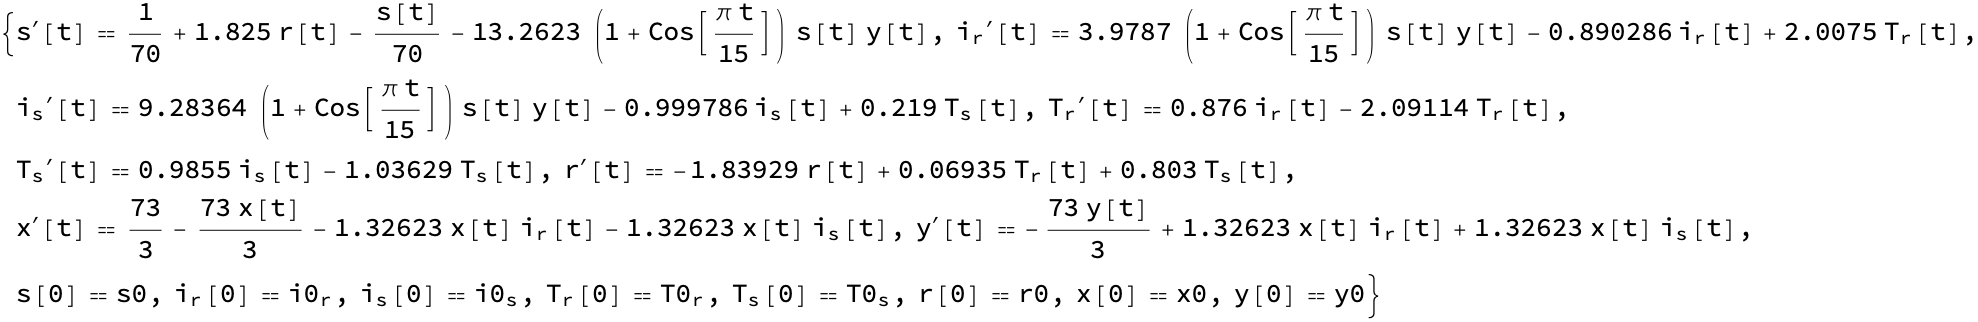

In [14]:
(*Lets see the system of differential equations with intial \
conditions that we need to solve with NDSolve*)
Join[
 equationsND /. parametersND,
 initialConditionsND
 ]

### Use Manipulate to find xint and yint

Legended[-Graphics-, Placed[PointLegend[{Directive[AbsoluteThickness[1.6], 
 
>       RGBColor[1, 0, 0], PointSize[0.02]]}, {Real data}, 
 
>     LegendMarkers -> {{False, Automatic}}, Joined -> {False}, LabelStyle -> {}, 
 
>     LegendLayout -> Column], After, Identity]]
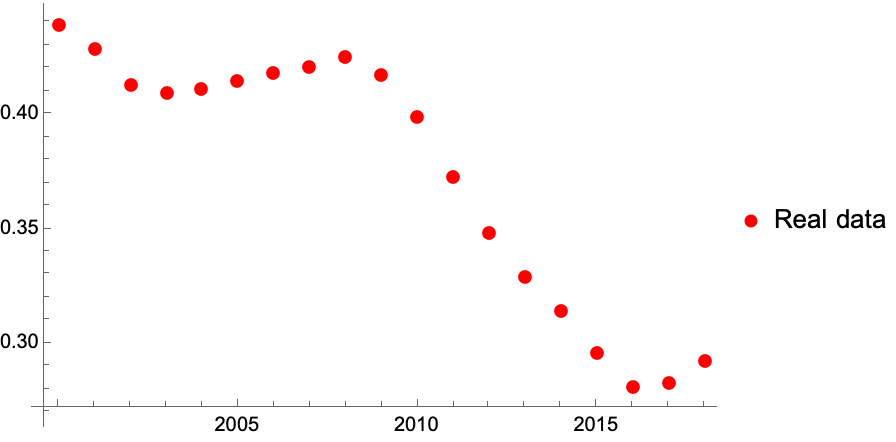

In [18]:
(*Create scaled incidence plot of real data points to compare model \
fit to*)
malariaIncidence = Map[{#[[1]], N[#[[2]]/1000]} &, malariaData];
(*Plot real incidence data to compare solution to*)
incidencePlot = ListPlot[
  malariaIncidence, 
  PlotStyle -> {Red, PointSize[0.02]},
  PlotLegends -> {"Real data"}
  ]

In [19]:
(*Define state variable intial values*)
initialValuesND =
  {
   s0 -> 0.56,(*s is 0.56 from Figure 4 plot 1*)
   Subscript[i0, r] -> 0.22,(*ir is 0.22 from Figure 4 plot 2*)
   Subscript[i0, s] -> 0.22,(*is is 0.22 from Figure 4 plot 2*)
   Subscript[T0, r] -> 0, (*First 6 state variables must sum to 1*)
   Subscript[T0, s] -> 0, (*First 6 state variables must sum to 1*)
   r0 -> 0, (*First 6 state variables must sum to 1*)
   x0 -> xint, (*Unknown, trying to find with Manipulate*)
   y0 -> 1 - xint (*x0 and y0 must sum to 1, 
   we are also trying to find this value with Manipulate*)
   };

Manipulate[xint = testingxint; manipulateSolution = 
 
>     NDSolve[Join[equationsND /. parametersND, initialConditionsND /. initialValuesND], 
 
>      stateVariablesND, {t, 0, 18}]; 
 
>    manipulateSolutionPlot = 
 
>     Plot[Evaluate[i [t] + i [t] /. manipulateSolution /. t -> t - 2000], 
                     r       s
 
>      {t, 2000, 2018}, ImageSize -> {500, 250}, AspectRatio -> Full, 
 
>      PlotLegends -> {Model estimate}, PlotRange -> {{2000, 2018}, {0.26, 0.44}}, 
 
>      Ticks -> {Range[2000, 2018, 2], Range[0.26, 0.44, 0.02]}]; 
 
>    Labeled[Show[manipulateSolutionPlot, incidencePlot], 
 
>     {Time(years), i [t]+\!SubscriptBox[i, \(s][t]}, {Bottom, Left}, 
                     r
 
>     RotateLabel -> True], {{testingxint, 0.975}, 0., 1.}]
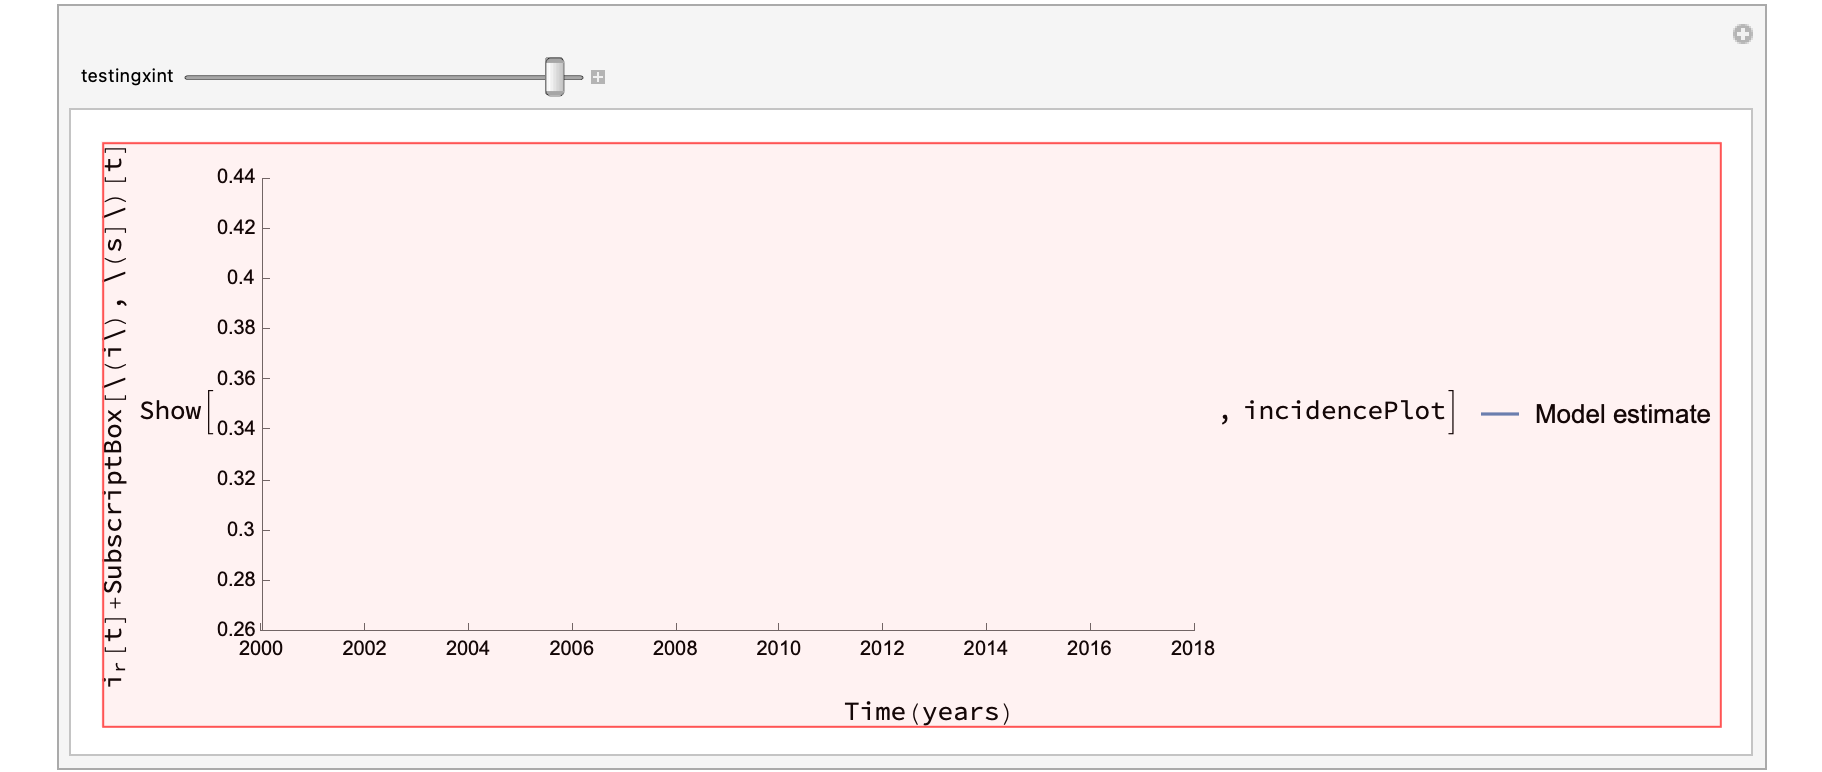

In [22]:
(*Use Manipulate function to find unknown parameter values.*)
Manipulate[
 xint = testingxint;
 (*Use NDSolve to solve system of differential equations*)
 manipulateSolution = NDSolve[
   Join[
    equationsND /. parametersND,
    initialConditionsND /. initialValuesND
    ],
   stateVariablesND,
   {t, 0, 18}
   ];
 (*Plot solution over the same constraints as figure 3, t is in real \
year (ex t=0 becomes 2000)*)
 manipulateSolutionPlot = Plot[
   Evaluate[(Subscript[i, r][t] + Subscript[i, s][t]) /. 
      manipulateSolution /. t -> t - 2000], 
   {t, 2000, 2018}, 
   ImageSize -> {500, 250},
   AspectRatio -> Full,
   PlotLegends -> {"Model estimate"},
   PlotRange -> {{2000, 2018}, {0.26, 0.44}},
   Ticks -> {Range[2000, 2018, 2], Range[0.26, 0.44, 0.02]}
   ];
 (*Overlay solution and real data*)
 Labeled[
  Show[manipulateSolutionPlot, incidencePlot],
  {"Time(years)", 
   "\!\(\*SubscriptBox[\(i\), \(r\)]\)[t]+\!\(\*SubscriptBox[\(i\), \
\(s\)]\)[t]"},
  {Bottom, Left},
  RotateLabel -> True
  ],
 {{testingxint, 0.975}, 0.0, 
  1.0} (*From our testing, it seems like 0.975 is the optimal x0 \
value*)
 ]

(* Unfortunately, this manipulate widget does not render correctly in iPython below *)

In [25]:
(*From our testing, we can conclude that xint should be 0.975*)
xint = 0.975;
(*yint will automatically become 1-xint*)

(*Lets also make sure our fit solution is clearly defined*)
solutionND = NDSolve[
   Join[
    equationsND /. parametersND,
    initialConditionsND /. initialValuesND
    ],
   stateVariablesND,
   {t, 0, 18}
   ];
(*Plot solution over the same constraints as figure 3, t is in real \
year (ex t=0 becomes 2000)*)
solutionPlot = Plot[
   Evaluate[(Subscript[i, r][t] + Subscript[i, s][t]) /. 
      solutionND /. t -> t - 2000], 
   {t, 2000, 2018}, 
   ImageSize -> {500, 250},
   AspectRatio -> Full,
   PlotLegends -> {"Model estimate"},
   PlotRange -> {{2000, 2018}, {0.26, 0.44}},
   Ticks -> {Range[2000, 2018, 2], Range[0.26, 0.44, 0.02]}
   ];

Labeled[Legended[Legended[-Graphics-, 
 
>     Placed[LineLegend[{Directive[Opacity[1.], RGBColor[0.368417, 0.506779, 0.709798], 
 
>         AbsoluteThickness[1.6]]}, {Model estimate}, LegendMarkers -> None, 
 
>       LabelStyle -> {}, LegendLayout -> Column], After, Identity]], 
 
>    Placed[PointLegend[{Directive[AbsoluteThickness[1.6], RGBColor[1, 0, 0], 
 
>        PointSize[0.02]]}, {Real data}, LegendMarkers -> {{False, Automatic}}, 
 
>      Joined -> {False}, LabelStyle -> {}, LegendLayout -> Column], After, Identity]], 
 
>   {Time(years), i [t]+\!SubscriptBox[i, \(s][t]}, {Bottom, Left}, 
                   r
 
>   RotateLabel -> True]
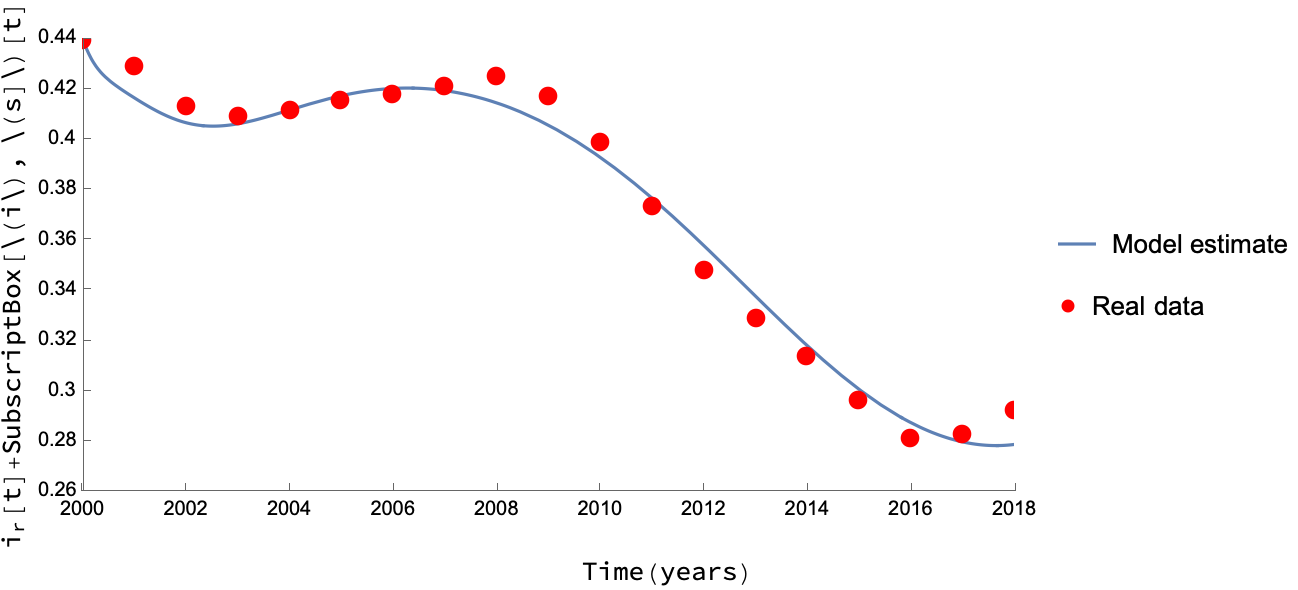

In [33]:
(*Lets see the final figure outside of manipulate!*)
figure3 = Labeled[
  Show[solutionPlot, incidencePlot],
  {"Time(years)", 
   "\!\(\*SubscriptBox[\(i\), \(r\)]\)[t]+\!\(\*SubscriptBox[\(i\), \
\(s\)]\)[t]"},
  {Bottom, Left},
  RotateLabel -> True
  ]

## Figure 4 Replication

In [34]:
(*Find solution to differential equations over the first 50 years for \
recreating figure 4*)
figure4SolutionND = NDSolve[
   Join[
    equationsND /. parametersND,
    initialConditionsND /. initialValuesND
    ],
   stateVariablesND,
   {t, 0, 50}
   ];

### Plot 1 Replication

Labeled[-Graphics-, {Time(years), Proportion of susceptible humans (s(t))}, 
 
>   {Bottom, Left}, RotateLabel -> True]
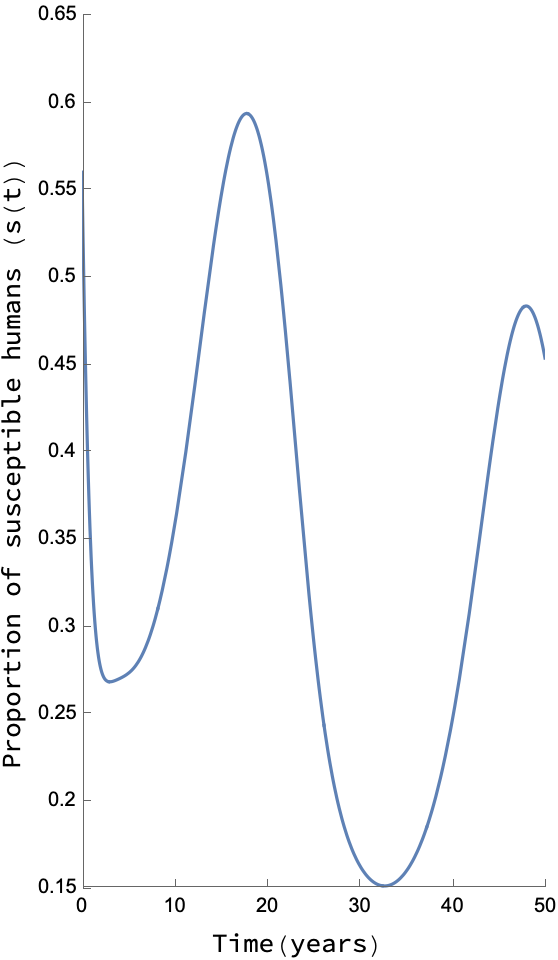

In [36]:
figure4plot1 =  Labeled[
  Plot[
   Evaluate[(s[t]) /. figure4SolutionND], 
   {t, 0, 50}, 
   ImageSize -> {260, 460},
   AspectRatio -> Full, 
   PlotRange -> {{0, 50}, {0.15, 0.65}},
   Ticks -> {Range[0, 50, 10], Range[0.15, 0.65, 0.05]}
   ],
  {"Time(years)", "Proportion of susceptible humans (s(t))"},
  {Bottom, Left},
  RotateLabel -> True
  ]

### Plot 2 Replication

Labeled[Legended[Legended[-Graphics-, 
 
>     Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[1.6], 
 
>         Dashing[{Small, Small}], RGBColor[1, 0, 0]]}, {i [t]}, LegendMarkers -> None, 
                                                          r
 
>       LabelStyle -> {}, LegendLayout -> Column], After, Identity]], 
 
>    Placed[LineLegend[{Directive[Opacity[1.], AbsoluteThickness[1.6], 
 
>        RGBColor[0, 0, 1]]}, {i [t]}, LegendMarkers -> None, LabelStyle -> {}, 
                                s
 
>      LegendLayout -> Column], After, Identity]], 
 
>   {Time (years), Proportion of infected humans}, {Bottom, Left}, RotateLabel -> True]
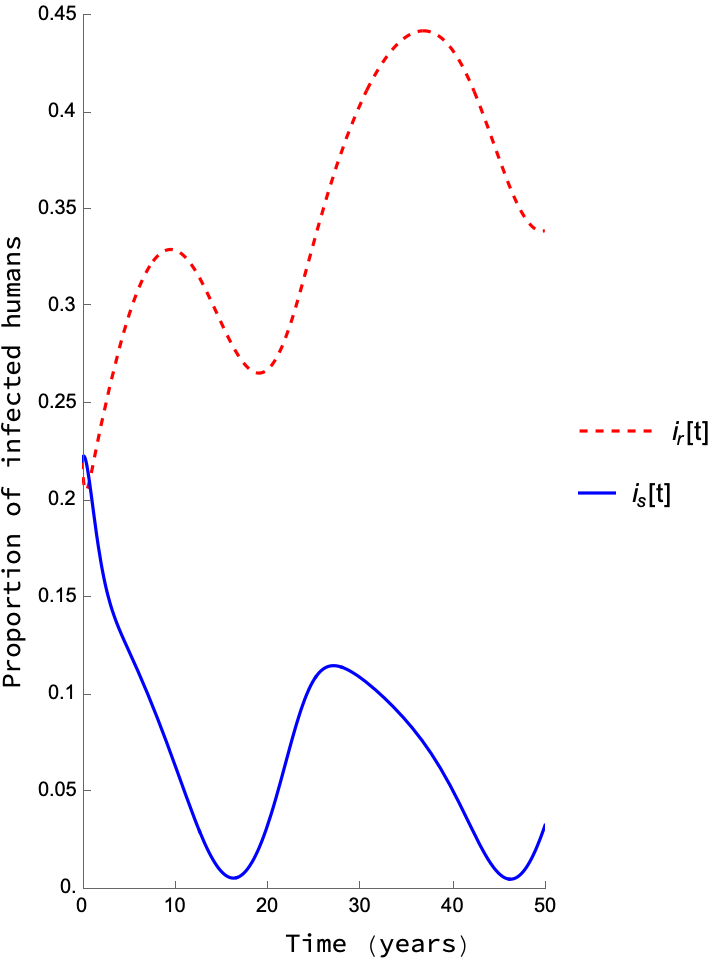

In [39]:
figure4plot2ir = Plot[
   Evaluate[(Subscript[i, r][t]) /. figure4SolutionND], 
   {t, 0, 50}, 
   ImageSize -> {260, 460},
   AspectRatio -> Full, 
   PlotRange -> {{0, 50}, {0, 0.45}},
   PlotStyle -> {Dashed, Red},
   Ticks -> {Range[0, 50, 10], Range[0, 0.45, 0.05]},
   PlotLegends -> {"\!\(\*SubscriptBox[\(i\), \(r\)]\)[t]"}
   ];
figure4plot2is = Plot[
   Evaluate[(Subscript[i, s][t]) /. figure4SolutionND], 
   {t, 0, 50}, 
   ImageSize -> {260, 460},
   AspectRatio -> Full, 
   PlotRange -> {{0, 50}, {0, 0.45}},
   PlotStyle -> {Blue},
   Ticks -> {Range[0, 50, 10], Range[0, 0.45, 0.05]},
   PlotLegends -> {"\!\(\*SubscriptBox[\(i\), \(s\)]\)[t]"}
   ];
figure4plot2 = Labeled[
  Show[figure4plot2ir, figure4plot2is],
  {"Time (years)", "Proportion of infected humans"},
  {Bottom, Left},
  RotateLabel -> True
  ]

### Plot 3 Replication

Labeled[-Graphics-, {Time (years), Proportion of infected humans (
 
>     \!SubscriptBox[i, \(r][t]+i [t])}, {Bottom, Left}, RotateLabel -> True]
                                       s
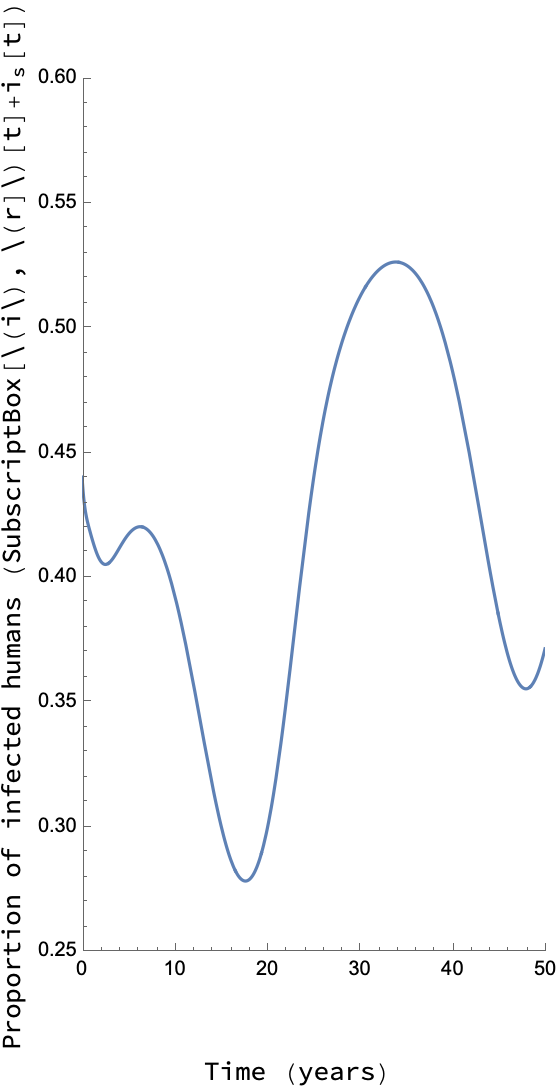

In [40]:
figure4plot3 = Labeled[
  Plot[
   Evaluate[(Subscript[i, r][t] + Subscript[i, s][t]) /. 
     figure4SolutionND], 
   {t, 0, 50}, 
   ImageSize -> {260, 460},
   AspectRatio -> Full,
   PlotRange -> {{0, 50}, {0.25, 0.6}}
   ],
  {"Time (years)", 
   "Proportion of infected humans (\!\(\*SubscriptBox[\(i\), \
\(r\)]\)[t]+\!\(\*SubscriptBox[\(i\), \(s\)]\)[t])"},
  {Bottom, Left},
  RotateLabel -> True
  ]

-Graphics-
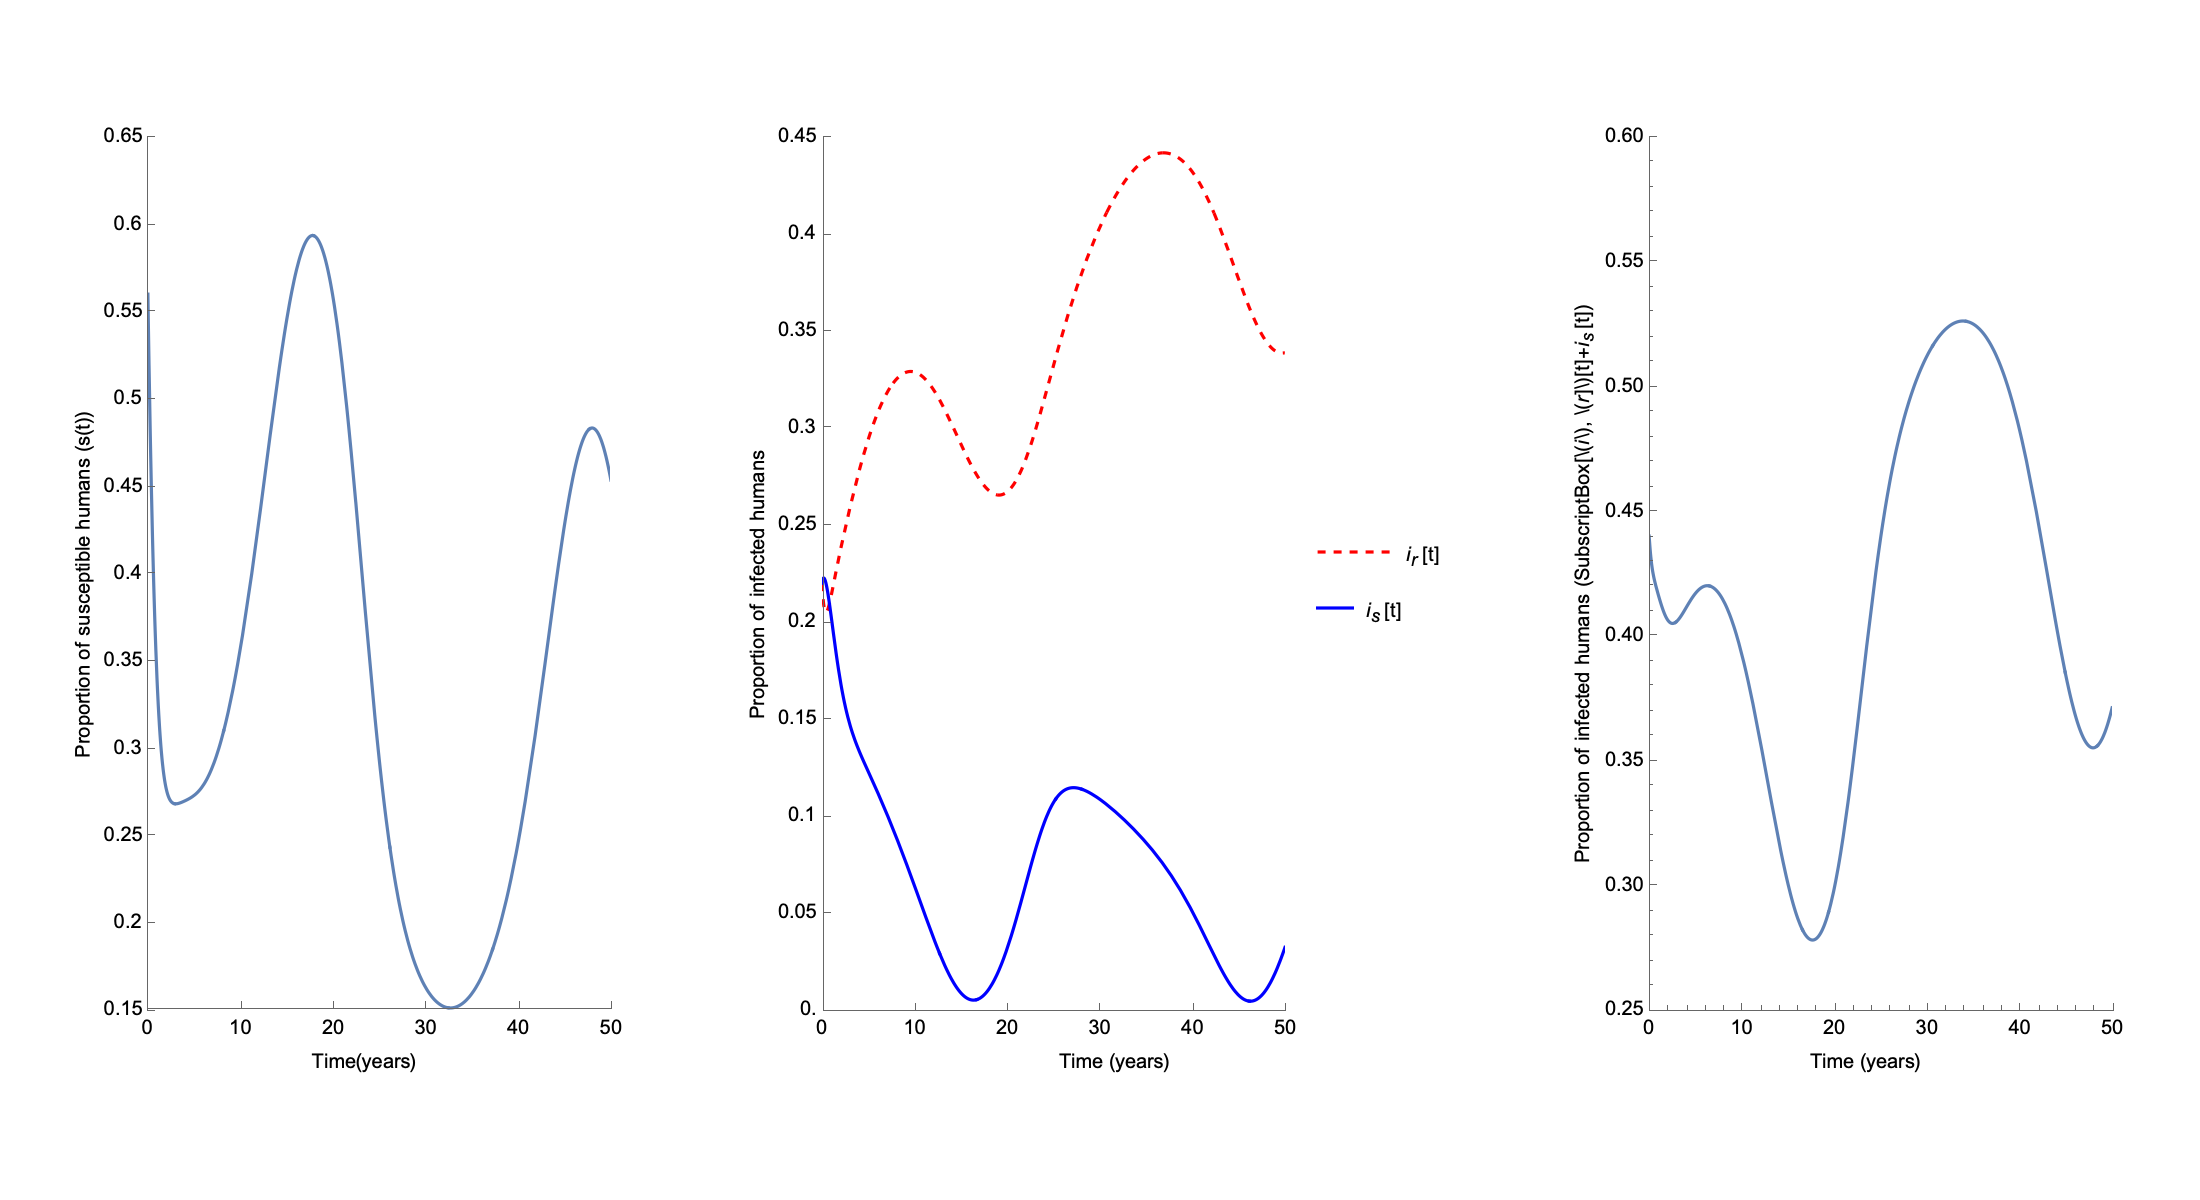

In [41]:
figure4 = GraphicsGrid[
  {{figure4plot1, figure4plot2, figure4plot3}},
  ImageSize -> {1100, 600},
  AspectRatio -> Full
  ]

(*Although it looks like plots 2 and 3 have slightly different values \
at t=0 in the original paper this is likely the original paper's \
fault. We know that s(0)=0.56. Thus plot 3 should have a value of \
1-0.56=0.44*)

## Figure 5 and 6 Replication Logic

## Define Helper Functions for Figures 5, 6, 7

## Figure 5 Replication

## Figure 6 Replication

## Figure 7 Replication

## Define Function and Parameters for Figures 8 and 9

## Figure 8 Replication

## Figure 9 Replication

## Extension Logic

## Define Model for Extension

## Extension Figure 1

## Extension Figure 2